# Predicting Rain In Australia

The dataset used here is [Rain In Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) from Kaggle. The objective here is to predict next day rain in Australia using classification models.

This dataset contains about 10 years of daily weather observations from different locations across Australia. RainTomorrow is the target variable to predict. This column is Yes if the rain for that day was 1mm or more and No otherwise.

## Imports

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

In [188]:
rain_df = pd.read_csv('raininaustralia/weatherAUS.csv')

In [189]:
rain_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [190]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [191]:
rain_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


## EDA

<AxesSubplot:>

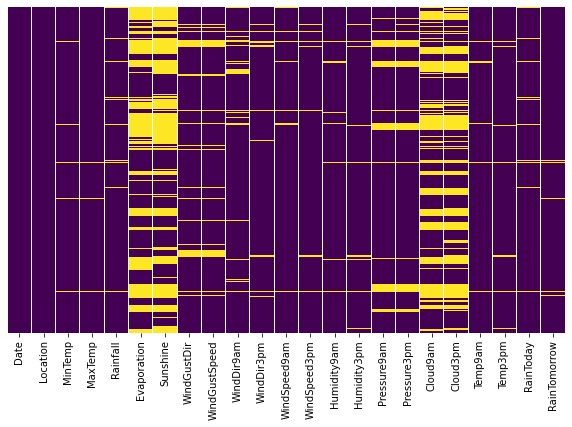

In [192]:
plt.figure(figsize=(10,6))
sns.heatmap(rain_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Here we can observe that there is a lot of missing data for Evaporation, Sunshine, Cloud9am, Cloud3pm. And there are null values in many other columns as well including the RainTomorrow column which is the target variable.

<AxesSubplot:>

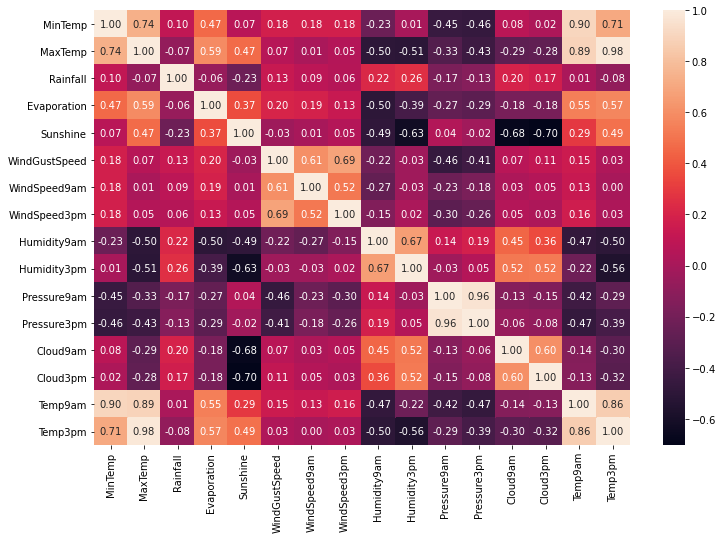

In [193]:
plt.figure(figsize=(12,8))
sns.heatmap(rain_df.corr(), annot=True, fmt='.2f')

We can see that there are many features which are negatively correlated as  well as which are positively correlated to each other.

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

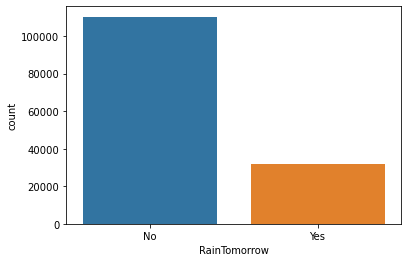

In [194]:
sns.countplot(x='RainTomorrow', data=rain_df)

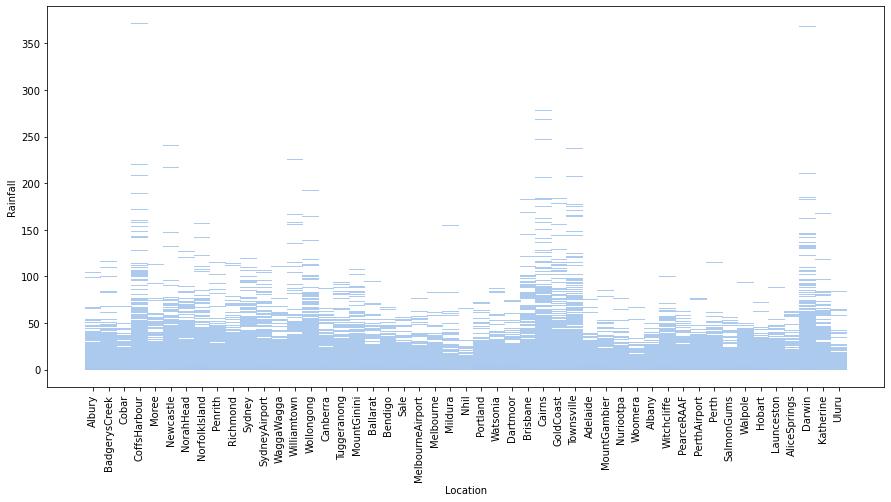

In [195]:
plt.figure(figsize=(15,7))
sns.histplot(x='Location', y='Rainfall', data=rain_df)
plt.xticks(rotation=90);

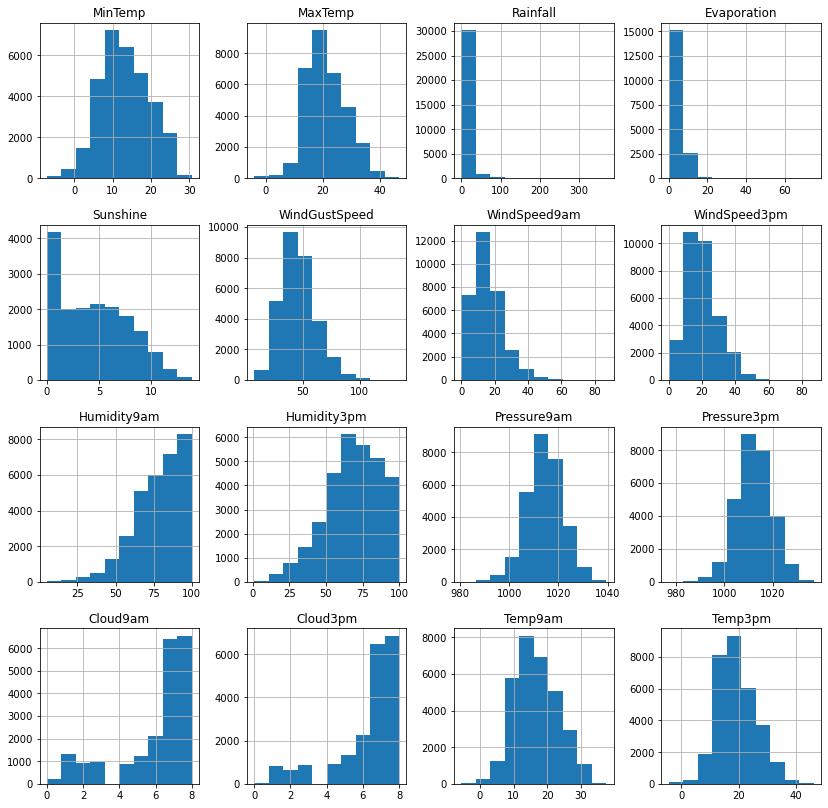

In [196]:
rain_df[rain_df['RainTomorrow']=='Yes'].hist(figsize=(14, 14));

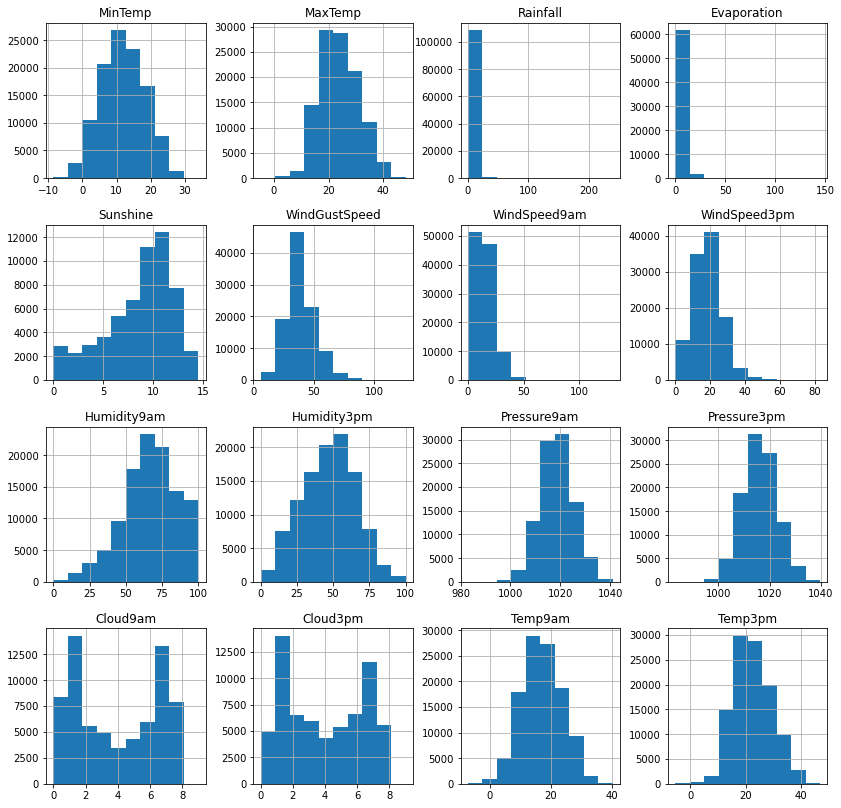

In [197]:
rain_df[rain_df['RainTomorrow']=='No'].hist(figsize=(14, 14));

## Data Cleaning, Data Imputation and Feature Engineering

Except the Date and the Location columns, all the remaining columns have missing data. We can study the data for each column and fill in the missing values. We can extract the month from the date and create a new feature for the month.

In [198]:
rain_df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [199]:
type(rain_df['Date'].iloc[0])

str

We need to convert the string type to datetime type and then extract the month.

In [200]:
rain_df['Date'] = pd.to_datetime(rain_df['Date'])

In [201]:
rain_df['Date'].iloc[0]

Timestamp('2008-12-01 00:00:00')

Now that the Date column are actually DateTime objects, we can create a new column called Month.

In [202]:
rain_df['Month'] = rain_df['Date'].apply(lambda x: x.month)

We know from the heatmap before that there is a lot of missing data in Evaporation, Sunshine, Cloud9am and Cloud3pm features.

In [203]:
rain_df['Location'].nunique()

49

In [204]:
rain_df[rain_df['Evaporation'].notnull()==True]['Location'].nunique()

33

We can observe that the total number of locations is 49 but there are only 33 locations for which the Evaporation data is available.

In [205]:
rain_df[rain_df['Sunshine'].notnull()==True]['Location'].nunique()

30

In [206]:
rain_df[rain_df['Cloud9am'].notnull()==True]['Location'].nunique()

37

In [207]:
rain_df[rain_df['Cloud3pm'].notnull()==True]['Location'].nunique()

37

There are many locations for which there is no data for Evaporation, Sunshine, Cloud9am and Cloud3pm. We will drop these columns from the dataset.

In [209]:
rain_df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'], inplace=True, axis=1)

We know that there are other columns with missing values. Let us first start with MinTemp column.

In [212]:
rain_df[rain_df['MinTemp'].isnull()==True][['Location','MinTemp','Month']]

,Location,MinTemp,Month
284,Albury,NaN,9
444,Albury,NaN,2
453,Albury,NaN,2
459,Albury,NaN,3
612,Albury,NaN,8
...,...,...,...
144324,Uluru,NaN,5
144325,Uluru,NaN,5
144326,Uluru,NaN,5
144925,Uluru,NaN,1


We can fill the missing MinTemp values by taking the mean by the Location and by Month. For each Location we can see what the mean MinTemp is for each Month. 

In [213]:
rain_df[rain_df['Location']=='Albury'].groupby('Month').mean()['MinTemp']

Month
1     16.874194
2     16.747321
3     13.790647
4      9.502083
5      5.455197
6      3.464528
7      3.654435
8      3.764777
9      5.800000
10     8.290688
11    12.552917
12    14.518548
Name: MinTemp, dtype: float64

We can fill the columns MaxTemp, Rainfall, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm with the mean values by Location by Month.

In [214]:
locations = rain_df['Location'].unique()
months = rain_df['Month'].unique()

In [215]:
for location in locations:
    
    # Calculating the mean by month for each location in the locations for each feature
    
    MinTemp_mean = rain_df[rain_df['Location']==location].groupby('Month').mean()['MinTemp']
    MaxTemp_mean = rain_df[rain_df['Location']==location].groupby('Month').mean()['MaxTemp']
    
    for month in months:
        
        # Finding the mean MinTemp value for the month in the loop
        # and replacing the missing values with that mean MinTemp value for the month
        MinTemp_mean_month = MinTemp_mean.loc[month]
        rain_df.loc[((rain_df['Location']==location) & (rain_df['Month']==month)), 'MinTemp'] = \
        rain_df.loc[((rain_df['Location']==location) & (rain_df['Month']==month)), 'MinTemp'].fillna(MinTemp_mean_month)
        
        # Finding the mean MaxTemp value for the month in the loop
        # and replacing the missing values with that mean MaxTemp value for the month
        MaxTemp_mean_month = MaxTemp_mean.loc[month]
        rain_df.loc[((rain_df['Location']==location) & (rain_df['Month']==month)), 'MaxTemp'] = \
        rain_df.loc[((rain_df['Location']==location) & (rain_df['Month']==month)), 'MaxTemp'].fillna(MaxTemp_mean_month)

In [216]:
for location in locations:
    
    # Calculating the mean by month for each location in the locations for each feature
    Rainfall_mean = rain_df[rain_df['Location']==location].groupby('Month').mean()['Rainfall']
    
    WindGustSpeed_mean = rain_df[rain_df['Location']==location].groupby('Month').mean()['WindGustSpeed']
    
    for month in months:
        
        # Finding the mean Rainfall value for the month in the loop
        # and replacing the missing values with that mean Rainfall value for the month
        Rainfall_mean_month = Rainfall_mean.loc[month]
        rain_df.loc[((rain_df['Location']==location) & (rain_df['Month']==month)), 'Rainfall'] = \
        rain_df.loc[((rain_df['Location']==location) & (rain_df['Month']==month)), 'Rainfall'].fillna(Rainfall_mean_month)
        
        # Finding the mean WindGustSpeed value for the month in the loop
        # and replacing the missing values with that mean WindGustSpeed value for the month
        WindGustSpeed_mean_month = WindGustSpeed_mean.loc[month]
        rain_df.loc[((rain_df['Location']==location) & (rain_df['Month']==month)), 'WindGustSpeed'] = \
        rain_df.loc[((rain_df['Location']==location) & (rain_df['Month']==month)), 'WindGustSpeed'].fillna(WindGustSpeed_mean_month)
        

In [217]:
for location in locations:
    
    # Calculating the mean by month for each location in the locations for each feature
    WindSpeed9am_mean = rain_df[rain_df['Location']==location].groupby('Month').mean()['WindSpeed9am']
    
    WindSpeed3pm_mean = rain_df[rain_df['Location']==location].groupby('Month').mean()['WindSpeed3pm']
    
    for month in months:
        
        # Finding the mean WindSpeed9am value for the month in the loop
        # and replacing the missing values with that mean WindSpeed9am value for the month
        WindSpeed9am_mean_month = WindSpeed9am_mean.loc[month]
        rain_df.loc[((rain_df['Location']==location) & (rain_df['Month']==month)), 'WindSpeed9am'] = \
        rain_df.loc[((rain_df['Location']==location) & (rain_df['Month']==month)), 'WindSpeed9am'].fillna(WindSpeed9am_mean_month)
        
        # Finding the mean WindSpeed3pm value for the month in the loop
        # and replacing the missing values with that mean WindSpeed3pm value for the month
        WindSpeed3pm_mean_month = WindSpeed3pm_mean.loc[month]
        rain_df.loc[((rain_df['Location']==location) & (rain_df['Month']==month)), 'WindSpeed3pm'] = \
        rain_df.loc[((rain_df['Location']==location) & (rain_df['Month']==month)), 'WindSpeed3pm'].fillna(WindSpeed3pm_mean_month)

In [218]:
for location in locations:
    
    # Calculating the mean by month for each location in the locations for each feature
    Humidity9am_mean = rain_df[rain_df['Location']==location].groupby('Month').mean()['Humidity9am']
    
    Humidity3pm_mean = rain_df[rain_df['Location']==location].groupby('Month').mean()['Humidity3pm']
    
    for month in months:
        
        # Finding the mean Humidity9am value for the month in the loop
        # and replacing the missing values with that mean Humidity9am value for the month
        Humidity9am_mean_month = Humidity9am_mean.loc[month]
        rain_df.loc[((rain_df['Location']==location) & (rain_df['Month']==month)), 'Humidity9am'] = \
        rain_df.loc[((rain_df['Location']==location) & (rain_df['Month']==month)), 'Humidity9am'].fillna(Humidity9am_mean_month)
        
        # Finding the mean Humidity3pm value for the month in the loop
        # and replacing the missing values with that mean Humidity3pm value for the month
        Humidity3pm_mean_month = Humidity3pm_mean.loc[month]
        rain_df.loc[((rain_df['Location']==location) & (rain_df['Month']==month)), 'Humidity3pm'] = \
        rain_df.loc[((rain_df['Location']==location) & (rain_df['Month']==month)), 'Humidity3pm'].fillna(Humidity3pm_mean_month)

In [219]:
for location in locations:
    
    # Calculating the mean by month for each location in the locations for each feature
    Pressure9am_mean = rain_df[rain_df['Location']==location].groupby('Month').mean()['Pressure9am']
    
    Pressure3pm_mean = rain_df[rain_df['Location']==location].groupby('Month').mean()['Pressure3pm']
    
    for month in months:
        
        # Finding the mean Pressure9am value for the month in the loop
        # and replacing the missing values with that mean Pressure9am value for the month
        Pressure9am_mean_month = Pressure9am_mean.loc[month]
        rain_df.loc[((rain_df['Location']==location) & (rain_df['Month']==month)), 'Pressure9am'] = \
        rain_df.loc[((rain_df['Location']==location) & (rain_df['Month']==month)), 'Pressure9am'].fillna(Pressure9am_mean_month)
        
        # Finding the mean Pressure3pm value for the month in the loop
        # and replacing the missing values with that mean Pressure3pm value for the month
        Pressure3pm_mean_month = Pressure3pm_mean.loc[month]
        rain_df.loc[((rain_df['Location']==location) & (rain_df['Month']==month)), 'Pressure3pm'] = \
        rain_df.loc[((rain_df['Location']==location) & (rain_df['Month']==month)), 'Pressure3pm'].fillna(Pressure3pm_mean_month)

In [220]:
for location in locations:
    
    # Calculating the mean by month for each location in the locations for each feature
    Temp9am_mean = rain_df[rain_df['Location']==location].groupby('Month').mean()['Temp9am']
    
    Temp3pm_mean = rain_df[rain_df['Location']==location].groupby('Month').mean()['Temp3pm']
    
    for month in months:
        
        # Finding the mean Temp9am value for the month in the loop
        # and replacing the missing values with that mean Temp9am value for the month
        Temp9am_mean_month = Temp9am_mean.loc[month]
        rain_df.loc[((rain_df['Location']==location) & (rain_df['Month']==month)), 'Temp9am'] = \
        rain_df.loc[((rain_df['Location']==location) & (rain_df['Month']==month)), 'Temp9am'].fillna(Temp9am_mean_month)
        
        # Finding the mean Temp3pm value for the month in the loop
        # and replacing the missing values with that mean Temp3pm value for the month
        Temp3pm_mean_month = Temp3pm_mean.loc[month]
        rain_df.loc[((rain_df['Location']==location) & (rain_df['Month']==month)), 'Temp3pm'] = \
        rain_df.loc[((rain_df['Location']==location) & (rain_df['Month']==month)), 'Temp3pm'].fillna(Temp3pm_mean_month)

Let us check for null values in the dataframe.

In [221]:
rain_df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir      10326
WindGustSpeed     6079
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am      12119
Pressure3pm      12119
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
Month                0
dtype: int64

Let us check if there are any missing values for any locations for the above columns with null values.

In [222]:
rain_df[rain_df['WindGustSpeed'].isnull()==True]['Location'].unique()

array(['Newcastle', 'Albany'], dtype=object)

In [223]:
rain_df[rain_df['Pressure9am'].isnull()==True]['Location'].unique()

array(['Newcastle', 'Penrith', 'MountGinini', 'SalmonGums'], dtype=object)

In [224]:
rain_df[rain_df['Pressure3pm'].isnull()==True]['Location'].unique()

array(['Newcastle', 'Penrith', 'MountGinini', 'SalmonGums'], dtype=object)

We can observe that there are few locations where there are null values for WindGustSpeed, Pressure9am and Pressure3pm.